# Importing Libraries

In [125]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import re
import string
import seaborn as sns

# Reading Fake and Real News Data from csv files

In [126]:
fake_news = pd.read_csv("Fake_News.csv")

In [127]:
real_news = pd.read_csv("Real_News.csv")

In [128]:
fake_news.head(10)
fake_news.shape

(23481, 4)

In [129]:
real_news.head(10)
real_news.shape

(21417, 4)

In [130]:
fake_news["class"]=0
real_news["class"]=1

# Extracting test data and training data from entire data

In [131]:
fn_testdata = fake_news.tail(10)
for i in range(23480,23470,-1):
    fake_news.drop([i],axis=0, inplace =True)
    

In [132]:
rn_testdata = real_news.tail(10)
for i in range(21416,21406,-1):
    real_news.drop([i],axis=0, inplace =True)

# Merging test data into one csv file

In [134]:
test_data = pd.concat([fn_testdata,rn_testdata],axis = 0)
test_data.to_csv("test_data.csv")

# Merging training data into one csv file

In [135]:
merged_data = pd.concat([fake_news,real_news],axis=0)

In [136]:
news = merged_data.drop(["title","subject","date"],axis=1)
news = news.sample(frac=1)

In [137]:
news.head(10)

,text,class
10427,WASHINGTON (Reuters) - The White House is eage...,1
16911,"Funding for Sanctuary Cities, benefits for ill...",0
5435,"On Saturday, Paul Ryan posted a photo to his I...",0
11783,"VIC/CERDANYOLA DEL VALLES, Spain (Reuters) - C...",1
12702,Melanie Trump is more than just a pretty face....,0
3625,Someone finally asked Kellyanne Conway how she...,0
15921,THIS IS HUGE! The DOJ has authorized the FBI I...,0
1885,The following statements were posted to the ve...,1
2724,Donald Trump s screaming banshee Kellyanne Con...,0
6688,The Republican-controlled southern states have...,0


In [14]:
news.isnull().sum()

text     0
class    0
dtype: int64

# Text Preprocessing

In [138]:
def preprocess_text(text):
    text=text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    return text

In [139]:
news["text"]=news["text"].apply(preprocess_text)

In [140]:
news.head(10)

,text,class
10427,washington reuters the white house is eage...,1
16911,funding for sanctuary cities benefits for ill...,0
5435,on saturday paul ryan posted a photo to his i...,0
11783,vic cerdanyola del valles spain reuters c...,1
12702,melanie trump is more than just a pretty face ...,0
3625,someone finally asked kellyanne conway how she...,0
15921,this is huge the doj has authorized the fbi i...,0
1885,the following statements were posted to the ve...,1
2724,donald trump s screaming banshee kellyanne con...,0
6688,the republican controlled southern states have...,0


In [141]:
X=news["text"]
Y=news["class"]

X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size= 0.3)

In [142]:
vector = TfidfVectorizer()
Xtrain_vectorize = vector.fit_transform(X_train)
xtest_vectorize = vector.transform(x_test)

# Logistic Regression

In [145]:
LR = LogisticRegression()
LR.fit(Xtrain_vectorize,Y_train)

logistic_pred=LR.predict(xtest_vectorize)
print("Accuracy:",LR.score(xtest_vectorize,y_test))

Accuracy: 0.9845513963161022


In [30]:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6936
           1       0.99      0.99      0.99      6528

    accuracy                           0.99     13464
   macro avg       0.99      0.99      0.99     13464
weighted avg       0.99      0.99      0.99     13464



<AxesSubplot:>

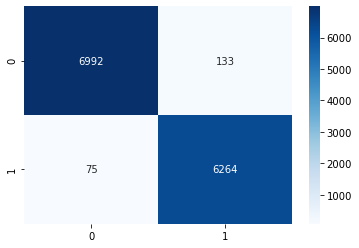

In [144]:
cfmatrix = confusion_matrix(y_test,logistic_pred)
sns.heatmap(cfmatrix,annot=True,fmt='',cmap='Blues')

# Decision Tree Classification

In [146]:
#Decision Tree Classification
tree = DecisionTreeClassifier()
tree.fit(Xtrain_vectorize,Y_train)
decision_pred=tree.predict(xtest_vectorize)
print("Accuracy:",tree.score(xtest_vectorize,y_test))

Accuracy: 0.9953951277480689


In [147]:
print(classification_report(y_test,decision_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       0.99      1.00      1.00      6339

    accuracy                           1.00     13464
   macro avg       1.00      1.00      1.00     13464
weighted avg       1.00      1.00      1.00     13464



<AxesSubplot:>

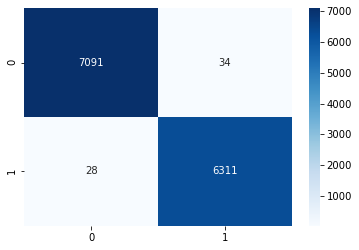

In [148]:
cfmatrix = confusion_matrix(y_test,decision_pred)
sns.heatmap(cfmatrix,annot=True,fmt='',cmap='Blues')

# Passive Aggressive Classification

In [149]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(Xtrain_vectorize,Y_train)
passive_pred=pac.predict(xtest_vectorize)
print("Accuracy:",pac.score(xtest_vectorize,y_test))

Accuracy: 0.9930926916221033


In [150]:
print(classification_report(y_test,passive_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7125
           1       0.99      0.99      0.99      6339

    accuracy                           0.99     13464
   macro avg       0.99      0.99      0.99     13464
weighted avg       0.99      0.99      0.99     13464



<AxesSubplot:>

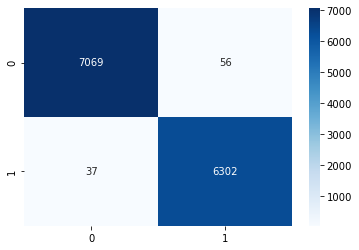

In [151]:
cfmatrix = confusion_matrix(y_test,passive_pred)
sns.heatmap(cfmatrix,annot=True,fmt='',cmap='Blues')

# Testing data whether news is fake or real

In [110]:
def fakenews_classifier(n):
    if n==0:
        return ("Input news is Fake.")
    elif n==1:
        return ("Input news is Real.")

In [152]:
def prediction(vector_new):
    pred_LR=LR.predict(vector_new)
    pred_tree=tree.predict(vector_new)
    pred_pac=pac.predict(vector_new)
    
    print("\nLR Prediction:",fakenews_classifier(pred_LR[0]))
    print("Decision Tree Prediction:",fakenews_classifier(pred_tree[0]))
    print("PassiveAggressive Prediction:",fakenews_classifier(pred_pac[0]))

In [153]:
def process_news(text):
    text=preprocess_text(text)
    testing_news={"news":[text]}
    vector_new=vector.transform(testing_news["news"])
    prediction(vector_new)


input_news = str(input())
process_news(input_news)

Patrick Henningsen  21st Century WireRemember when the Obama Administration told the world how it hoped to identify 5,000 reliable non-jihadist  moderate  rebels hanging out in Turkey and Jordan, who might want to fight for Washington in Syria? After all the drama over its infamous  train and equip  program to create their own Arab army in Syria, they want to give it another try.This week, Pentagon officials announced their new plan to train up to 7,000 more  moderate  fighters, but this time the project would take place inside Syria (and to hell with international law).We re told that this was requested by Ankara, and with all NATO allies singing the same hymn   claiming that this new effort will help in securing Turkey s porous border with Syria, or so the story goes. Washington s political cover for this is fashioned from the popular post-Paris theme: to protect civilized Europe from invading hordes and the terrorists who hide among them, as stated in the Wall Street Journal: The pr


LR Prediction: Input news is Fake.
Decision Tree Prediction: Input news is Fake.
PassiveAggressive Prediction: Input news is Fake.
